# Testing Python tight-binding

In [10]:
%matplotlib notebook

import pathlib
import pythtb as pytb

import sim_tb as stb

In [5]:
path = pathlib.Path("tests/")
stb.create_hoppings_toy_model(path, 1, 0.0, 0.1)
Sim = stb.Simulation_TB(path)
Sim.model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 3
number of spin components   = 2
periodic directions         = [0, 1]
number of orbitals          = 4
number of electronic states = 8
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [    -0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,  0.6667 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.1667 ,     0.0 ]
 #  1  ===>  [  0.8333 ,  0.1667 ,     0.0 ]
 #  2  ===>  [  0.3333 ,  0.6667 ,     0.0 ]
 #  3  ===>  [  0.8333 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>   [[ 0.1+0.j  0. +0.j]  [ 0. +0.j -0.1+0.j]]
 #  1  ===>   [[-0.1+0.j  0. +0.j]  [ 0. +0.j  0.1+0.j]]
 #  2  ===>   [[-0.1+0.j  0. +0.j]  [ 0. +0.j  0.1+0.j]]
 #  3  ===>   [[ 0.1+0.j  0. +0.j]  [ 0. +0.j -0.1+0.j]]
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>  [[1.+0.j 0.+0.j]  [0.+0.j 1.+0.j]]
<  0 

## Example of pytb Use: Berry curvature around Dirac Cones
### Compute Berry phase around Dirac cone in graphene with staggered onsite term delta

In [7]:


# define lattice vectors
lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3.],[2./3.,2./3.]]

# make two dimensional tight-binding graphene model
my_model = pytb.tb_model(2,2,lat,orb)

# set model parameters
delta=-0.1 # small staggered onsite term
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0])
my_model.set_hop(t, 1, 0, [ 0, 1])

# print tight-binding model
my_model.display()



---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ]
 #  1  ===>  [  0.6667 ,  0.6667 ]
site energies:
 #  0  ===>       0.1
 #  1  ===>      -0.1
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  0 ,  1 ] ) |  =    0.5774



Berry phase along circle with radius:  0.05
  centered at k-point:  [0.33333333 0.66666667]
  for band 0 equals    :  2.068204018990522
  for band 1 equals    :  -2.068204018990522
  for both bands equals:  1.5265566588595873e-16

Berry flux on square patch with length:  0.1
  centered at k-point:  [0.33333333 0.66666667]
  for band 0 equals    :  2.179216480131516
  for band 1 equals    :  -2.179216480131517
  for both bands equals:  5.184338601638338e-16

(30, 30)


<IPython.core.display.Javascript object>


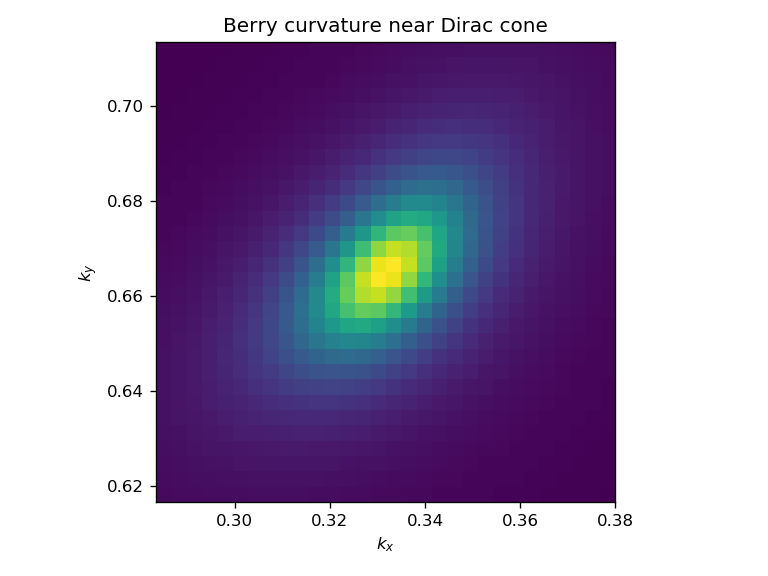

Done.



In [15]:
# construct circular path around Dirac cone
#   parameters of the path
circ_step = 31
circ_center = np.array([1.0/3.0,2.0/3.0])
circ_radius = 0.05
# one-dimensional wf_array to store wavefunctions on the path
w_circ = pytb.wf_array(my_model,[circ_step])
# now populate array with wavefunctions
for i in range(circ_step):
    # construct k-point coordinate on the path
    ang=2.0*np.pi*float(i)/float(circ_step-1)
    kpt=np.array([np.cos(ang)*circ_radius,np.sin(ang)*circ_radius])
    kpt+=circ_center
    # find eigenvectors at this k-point
    (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
    # store eigenvector into wf_array object
    w_circ[i]=evec
# make sure that first and last points are the same
w_circ[-1]=w_circ[0]

# compute Berry phase along circular path
print("Berry phase along circle with radius: ",circ_radius)
print("  centered at k-point: ",circ_center)
print("  for band 0 equals    : ", w_circ.berry_phase([0],0))
print("  for band 1 equals    : ", w_circ.berry_phase([1],0))
print("  for both bands equals: ", w_circ.berry_phase([0,1],0))
print()

# construct two-dimensional square patch covering the Dirac cone
#  parameters of the patch
square_step=31
square_center=np.array([1.0/3.0,2.0/3.0])
square_length=0.1
# two-dimensional wf_array to store wavefunctions on the path
w_square= pytb.wf_array(my_model,[square_step,square_step])
all_kpt=np.zeros((square_step,square_step,2))
# now populate array with wavefunctions
for i in range(square_step):
    for j in range(square_step):
        # construct k-point on the square patch
        kpt=np.array([square_length*(-0.5+float(i)/float(square_step-1)),
                      square_length*(-0.5+float(j)/float(square_step-1))])
        kpt+=square_center
        # store k-points for plotting
        all_kpt[i,j,:]=kpt
        # find eigenvectors at this k-point
        (eval,evec)=my_model.solve_one(kpt,eig_vectors=True)
        # store eigenvector into wf_array object
        w_square[i,j]=evec

# compute Berry flux on this square patch
print("Berry flux on square patch with length: ",square_length)
print("  centered at k-point: ",square_center)
print("  for band 0 equals    : ", w_square.berry_flux([0]))
print("  for band 1 equals    : ", w_square.berry_flux([1]))
print("  for both bands equals: ", w_square.berry_flux([0,1]))
print()

# also plot Berry phase on each small plaquette of the mesh
plaq=w_square.berry_flux([0],individual_phases=True)
#
print(np.shape(plaq))
fig, ax = plt.subplots()
ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()
fig.savefig("cone_phases.pdf")

print('Done.\n')

(199, 199)


<IPython.core.display.Javascript object>


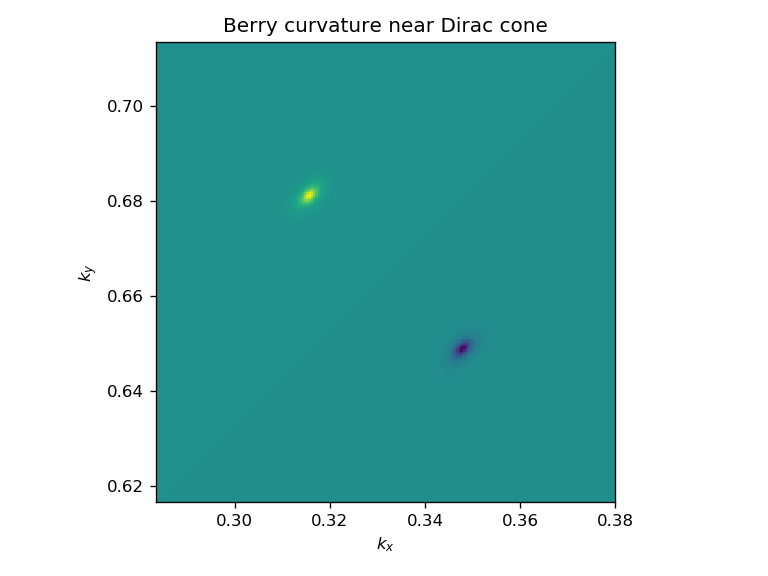

Done.



In [20]:
w_square= pytb.wf_array(my_model,[200,200])
w_square.solve_on_grid([0,0])

plaq=w_square.berry_flux([0],individual_phases=True)
#
print(np.shape(plaq))
fig, ax = plt.subplots()
ax.imshow(plaq.T,origin="lower",
          extent=(all_kpt[0,0,0],all_kpt[-2, 0,0],
                  all_kpt[0,0,1],all_kpt[ 0,-2,1],))
ax.set_title("Berry curvature near Dirac cone")
ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
fig.tight_layout()
fig.savefig("cone_phases.pdf")

print('Done.\n')